Projeto - Gerando resultados com o Seaborn

Considerações iniciais

Este notebook tem o objetivo de orientá-lo sobre o uso inicial da biblioteca Seaborn.

Por que o Seaborn?
O Seaborn fornece uma interface de alto nível para o Matplotlib, uma biblioteca de visualização Python poderosa, mas às vezes pesada. Apesar o Matplotlib ser bem completo, muitas vezes, você precisa Dentre as séries de vantagens do seaborn tenta facilitar do, a biblioteca tenta facilitar:

Usar temas padrão que são esteticamente agradáveis.

Definir paletas de cores personalizadas.

Fazer gráficos estatísticos atraentes.

Exibit distribuições com facilidade e flexibilidade.

Visualizar as informações de matrizes e DataFrames.

Esses três últimos pontos são o motivo pelo qual a Seaborn é a nossa ferramenta preferida por muitos cientistas de dados, pois torna muito fácil "conhecer" seus dados com rapidez e eficiência.


Contudo, não se esqueca! Seaborn é um complemento, e não um substituto, para o Matplotlib. Existem alguns ajustes que ainda exigem o Matplotlib.

Prepare seu ambiente

Se necessário, faça a instalação da biblioteca no seu sistema usando o gerenciador de pacotes da linguagem Python:

$ pip install seaborn

Ou caso esteja usando o Anaconda:

$ conda install seaborn

Conjunto de dados

O conjunto de dados que iremos utilizar é a base de dados de alguns pokemons.

Descrição do dados

No arquivo pokemon.csv, você encontrará as seguintes colunas:

Name: Nome em inglês do pokemon
Type 1: Tipo primário do pokemon
Type 2: Tipo secundário do pokemon
Total: Total
HP: Pontos de vida
Attack: Pontos de ataque
Defense: Pontos de defesa
Sp. Atk: Pontos base do ataque especial
Sp. Def: Pontos base da defesa especial
Speed: Pontos de agilidade
Stage: Estágio de evolução
Legendary: Se o pokemon é legendário.
Procedimentos
Importando as bibliotecas
Para começarmos, vamos carregar as bibliotecas necessários no nosso ambiente.

%matplotlib inline: é uma Magic Word do Jupyter Notebook que informa à plataforma que queremos os nosso gráficos plotados diratemente no noteobok.
pandas: A biblioteca pandas fornece estruturas e ferramentas de análise de dados. Iremos utilizá-la para carregar o nosso conjunto de dados em um dataframe. A convenção recomanda que utilizemos a variável pd.
seaborn: Nossa biblioteca que é a principal atração de hoje.
matplotlib.pyplot: A ferramenta em que iremos treinar. Novamente, a convenção recomenda que importemos o matplotlib.pyplot no nome plt.

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/awarischool/visualizacao_exploratoria_exercicios/master/02-exercicios-seaborn/pokemon.csv'

In [ ]:
pokemon = pd.read_csv(url,encoding='latin-1',index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Funções de plotagem

Um dos maiores pontos fortes de Seaborn é a diversidade de funções de plotagem. Por exemplo, para criar um gráfico de dispersão é necessário apenas uma linha de código usando a função sns.lmplot().

Existem duas maneiras de fazer isso.

A propósito, Seaborn não tem uma função dedicada de plotagem de dispersão e é por isso que você vê uma linha diagonal. Na verdade, usamos a função de Seaborn para ajustar e traçar uma linha de regressão.

Felizmente, cada função de plotagem possui várias opções úteis que você pode definir.

A primeira maneira (recomendada) é passar seu DataFrame para o argumento data =, enquanto passa nomes de colunas para os argumentos dos eixos, x = e y =.
A segunda é passar diretamente a série de dados para os argumentos dos eixos.
Por exemplo, vamos comparar as estatísticas de Ataque e Defesa dos nossos Pokémons:

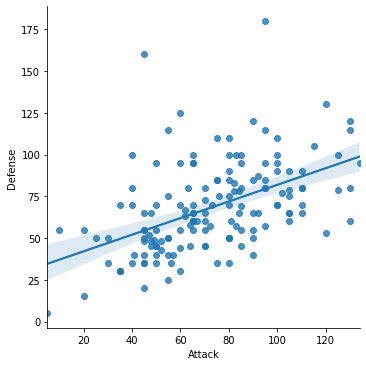

In [ ]:
sns.lmplot(x='Attack', y='Defense', data=pokemon)

TAREFA 01

Usando a função sns.lmplot(), plote um gráfico de dispersão sem a linha de regressão e agrupe os pokemons por estágio de evolução colorindo-os (coluna 'Stage').

DICA 01: Use o argumento fit_reg para remover a linha de regressão.

DICA 02: Use o argumento hue e o valor 'Stage' para colorir os pontos.

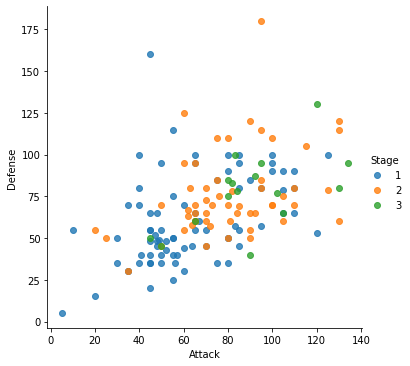

In [ ]:
#Lembrar do case sensitive
sns.lmplot(x='Attack',y='Defense',data=pokemon, fit_reg=False,hue='Stage')

Customizando com o Matplotlib

E aqui começamos a fazer uso do Matplotlib para customizar o Seaborn. Lembre-se, o Seaborn é um complemento para o Matplotlib. O Seaborn vai lhe trazer muitas facilidades, mas às vezes você precisará fazer uso do Matplotlib para alguns ajustes.

Para definir os limites dos eixos X e Y, vamos usar o Matplotlib:

Primeiro, invoque sua função de plotagem Seaborn normalmente.
Em seguida, invoque as funções de personalização do Matplotlib. Nesse caso, usaremos suas funções plt.ylim() e plt.xlim().

(0.0, 200.0)

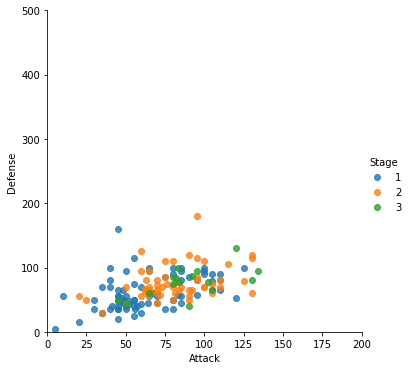

In [ ]:
ax = sns.lmplot(x='Attack', y='Defense', data=pokemon, fit_reg=False, hue='Stage')
# Ajustando com o Matplotlib
plt.ylim(0, 500)
plt.xlim(0, 200) 

TAREFA 02

Usando o Matplotlib, mude os nomes dos eixos x e y para "Ataque" e "Defesa", respectivamente.

Text(0.5, 1.0, 'Pokemons Ataque x Defesa')

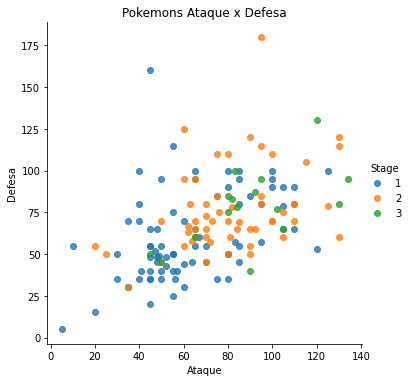

In [ ]:
ax = sns.lmplot(x='Attack', y='Defense', data=pokemon, fit_reg=False, hue='Stage')
plt.ylabel("Defesa")
plt.xlabel("Ataque")
plt.title("Pokemons Ataque x Defesa")

Seaborn e o pandas

Mesmo que este seja um tutorial de Seaborn, o Pandas realmente também desempenha um papel muito importante. As funções de plotagem do Seaborn se beneficiam da estrutuda do dataFrame do pandas. Para plotar um gráfico de diagrama de caixas, você poderia passar o dataframe direto para dentro da função de plotagem sns.boxplot(). Veja:

Apesar de ser um gráfico razoável, alguns colunas não fazem muito sentido:

Podemos remover a coluna "Total", pois temos estatísticas individuais.
Podemos remover as colunas "Stage" e "Lengedary" porque elas não são estatísticas de combate.
Como o Seaborn é amigável com Pandas, esta tarefa é muito mais fácil de ser feita no próprio dataframe.

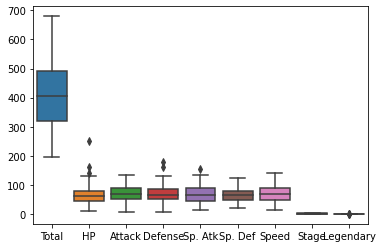

In [ ]:
sns.boxplot(data=pokemon)

TAREFA 03

Remova as colunas "Total", "Stage" e "Legendary" do dataframe e repasse o resultado para a função de plotagem sns.boxplot().

Dica: Utilize o método drop() do dataframe para remover as colunas indesejadas.

In [ ]:
del pokemon['Total']
del pokemon['Stage']
del pokemon['Legendary']
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


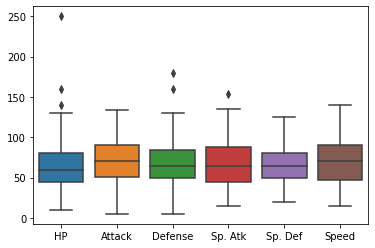

In [ ]:
sns.boxplot(data=pokemon)

Temas do Seaborn

Outra vantagem do Seaborn é que ele vem com temas de estilo decente, prontos para uso - whitegrid, darkgrid, white, dark e ticks.

Os gráficos de violino são alternativas úteis às plotagens de caixas. Eles mostram a distribuição (através da espessura do violino) em vez de apenas as estatísticas resumidas.

TAREFA 04

Alterne entre os temas do Seaborn.

DICA: Utilize a função sns.set_style() para definir os temas antes de chamar a função de plotagem.

Paleta de Cores

Felizmente, o Seaborn nos permite definir paletas de cores personalizadas. Podemos simplesmente criar uma lista Python ordenada de valores hexadecimais de cores.

Vamos usar o Bulbapedia para nos ajudar a criar uma nova paleta de cores:

In [ ]:
pokemon_cores = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8'  # Dragon
]

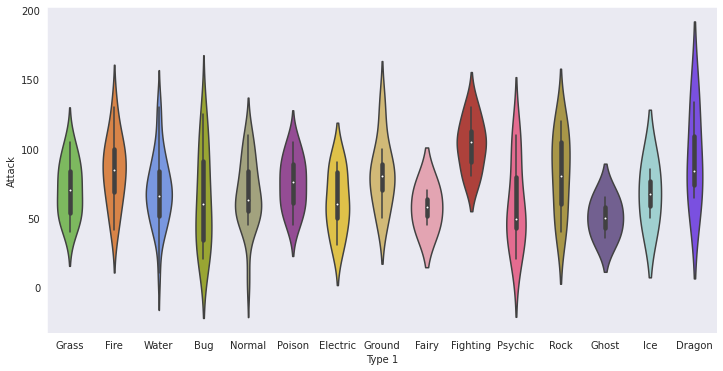

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type 1', y='Attack', data=pokemon, palette=pokemon_cores)

Muito melhor! Os gráficos de violino são ótimos para visualizar distribuições. No entanto, como temos apenas 151 Pokémon em nosso conjunto de dados, podemos simplesmente exibir cada ponto.

Vamos plotar um gráfico de enxame (swarm plot). Essa visualização mostrará cada ponto, enquanto "empilha" aqueles com valores semelhantes.

TAREFA 05

Plote um gráfico de enxame (swarmplot) usando a paleta do cores do exemplo anterior - pokemon_cores.

DICA: Utilize a função de plotagem sns.swarmplot()

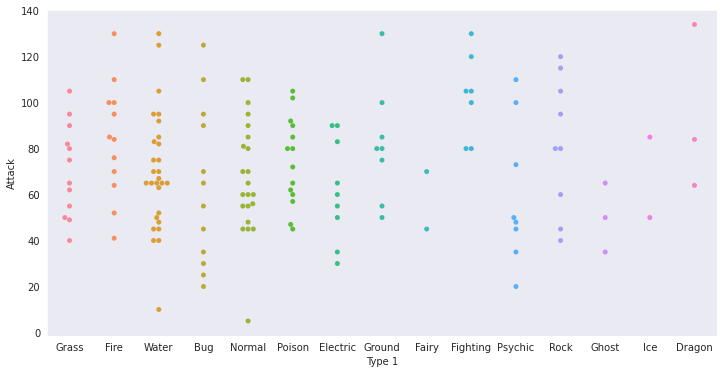

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Type 1', y='Attack', data=pokemon)

Isso é útil, mas não podemos combinar nosso gráfico de enxame e de violino? Afinal, eles exibem informações semelhantes, certo?

Sobreposição de gráficos

A resposta é sim. É bastante simples sobrepor plotagens usando Seaborn e funciona da mesma maneira que com Matplotlib. Aqui está o que faremos:

Primeiro, aumentaremos nossa figura usando o Matplotlib.

Então, desenharemos o gráfico de violino. No entanto, definiremos inner = None para remover as barras dentro dos violinos.

Depois, desenharemos o gráfico de enxame. Desta vez, deixaremos os pontos pretos para que eles apareçam mais.

Por fim, definiremos um título usando o Matplotlib.

Parece muita coisa? Então veja como é simples:

Text(0.5, 1.0, 'Ataque por tipo de Pokemon')

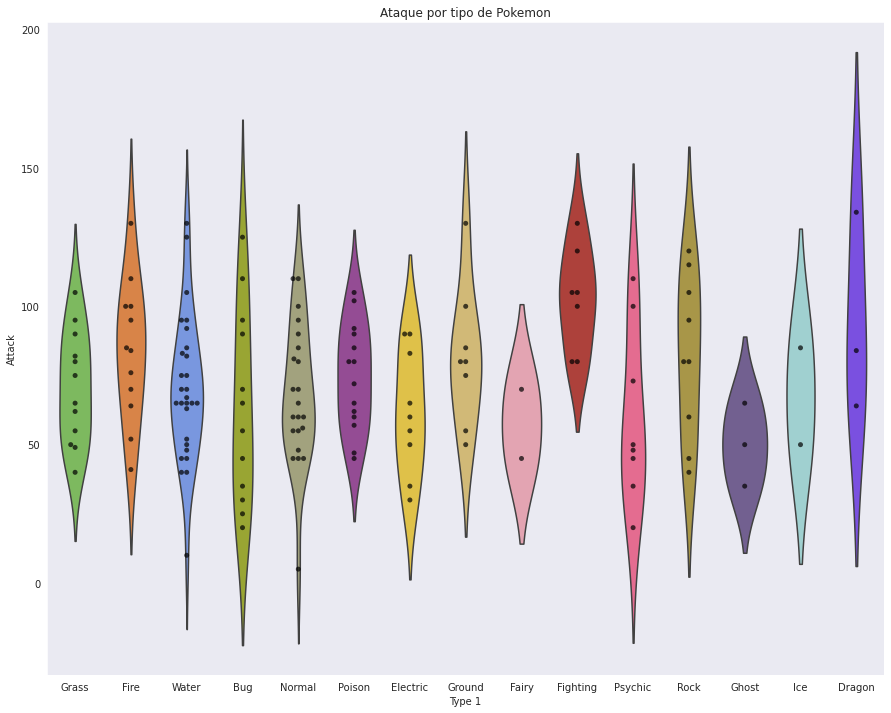

In [ ]:
plt.figure(figsize=(15,12))
 
# Crie o gráfico de violino.
sns.violinplot(x='Type 1', y='Attack', data=pokemon, inner=None, palette=pokemon_cores)

# Crie o gráfico de enxame.
sns.swarmplot(x='Type 1', y='Attack', data=pokemon, color='k', alpha=0.7)
 
# Define o título usando o Matplotlib
plt.title('Ataque por tipo de Pokemon')

Incrível, agora temos um gráfico bonito que mostra como os valores de ataque são distribuídos entre os diferentes tipos de Pokémon.

Outras visualizações

Concluiremos as tarefas com algumas visualizações rápidas, mas que podem ser bastante úteis.

TAREFA 06

Os mapas de calor (em inglês, heatmap) ajudam a visualizar dados do tipo matriz. Crie um heatmap de correlação do dataframe df.

Dica 01: Antes de plot, crie a matriz de correlação do dataframe através do método corr().

Dica 02: Utilize a função de plotagem sns.heatmap().

In [ ]:
pokemon.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


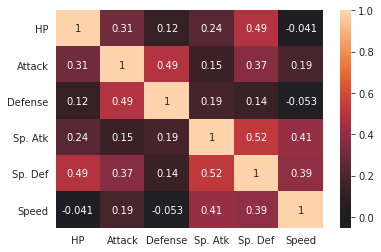

In [ ]:
sns.heatmap(pokemon.corr(), annot=True, center=0)

TAREFA 07

Os histogramas permitem plotar as distribuições de variáveis numéricas. Plote um histograma usando as informações de ataque (Atack) dos pokemons.

Dica: Utilize a função de plotagem sns.distplot().

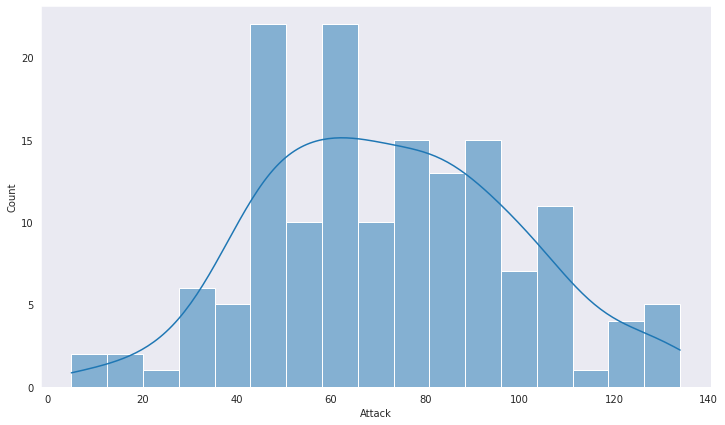

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(data = pokemon, x='Attack',kde=True,bins=17)

TAREFA 08

Os gráficos de barra ajudam a visualizar as distribuições de variáveis categóricas. Plote um gráfico de barra usando a variável "Type 1".

Dica 01: Utilize a função de plotagem sns.countplot().

Dica 02: Caso a plotagem fique desajustada, aumente o tamanho usando o Matplotlib.

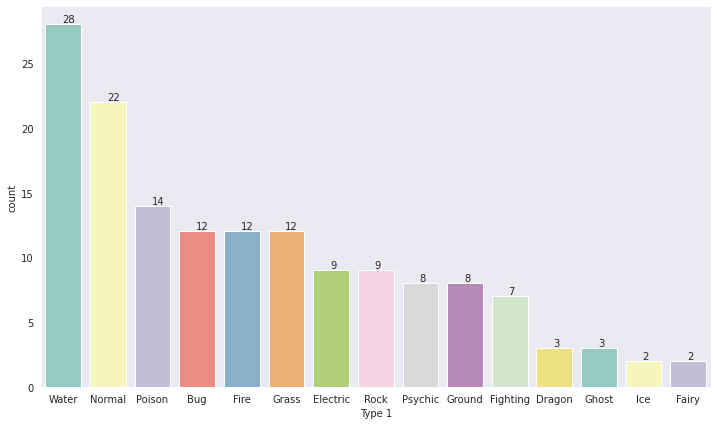

In [ ]:
plt.figure(figsize=(12,7))
ax= sns.countplot(data=pokemon,x='Type 1', palette="Set3",order = pokemon['Type 1'].value_counts().index)
for p, label in zip(ax.patches, pokemon["Type 1"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))